Afterglows in UV
---------------

### Swift UVOT

now look at UV [W1 filter](https://www.swift.ac.uk/analysis/uvot/filters.php)

In [1]:
#caldb_setup_files.tar.Z
from astropy.io import fits
ww=fits.open("/home/limu/Space/data/swift/GRB-Cat.fits")[1]

cnames=[c.name for c in ww.data.columns]

(array([ 1.,  0.,  2.,  3.,  4.,  6.,  8., 15., 14., 17., 24., 11.,  3.,
         3.,  2.,  0.,  1.,  0.,  0.,  2.]),
 array([-2.55430007, -2.31076503, -2.06722999, -1.82369506, -1.58016002,
        -1.3366251 , -1.09309006, -0.84955502, -0.60602003, -0.36248502,
        -0.11895001,  0.124585  ,  0.36812001,  0.611655  ,  0.85519004,
         1.09872508,  1.34226   ,  1.58579504,  1.82933009,  2.07286501,
         2.31640005]),
 <BarContainer object of 20 artists>)

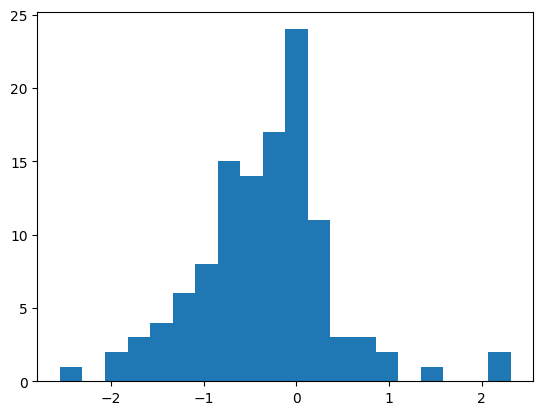

In [2]:
sel=ww.data['ALP1_W1']>-10
from matplotlib import pyplot as pl
pl.hist(ww.data['ALP1_W1'][sel],20)

In [3]:
zimg=fits.open("/home/limu/Space/data/swift/Image-Event_3db.fits")[1]

In [4]:
from collections import Counter
fsel=zimg.data['FILTER']=='UVW1'#'UVM2'
grbs=Counter(list(zimg.data['OBJECT'][fsel]))
sel_obj=[g for g in grbs if grbs[g]>100]
len(sel_obj),sel_obj[0]

(27, 'GRB050525')

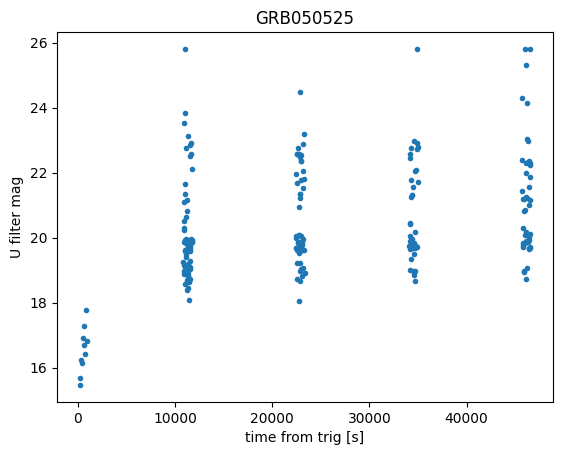

In [5]:
import numpy as np
from matplotlib import pyplot as pl
def sel_plot(name):
    osel=zimg.data['OBJECT']==name
    ids1=np.where(osel*fsel)[0]
    t0=zimg.data['TRIGTIME'][ids1[0]]
    tobs=zimg.data['TSTART'][osel*fsel]-t0
    mag,emag=zimg.data['MAG'][osel*fsel],zimg.data['MAG_ERR'][osel*fsel]
    qsel=mag<99
    pl.plot(tobs[qsel],mag[qsel],'.')#,emag)
    pl.title(sel_obj[0])
    pl.ylabel('U filter mag')
    pl.xlabel('time from trig [s]')
    return [tobs[qsel],mag[qsel],emag[qsel]]
out=sel_plot(sel_obj[1])

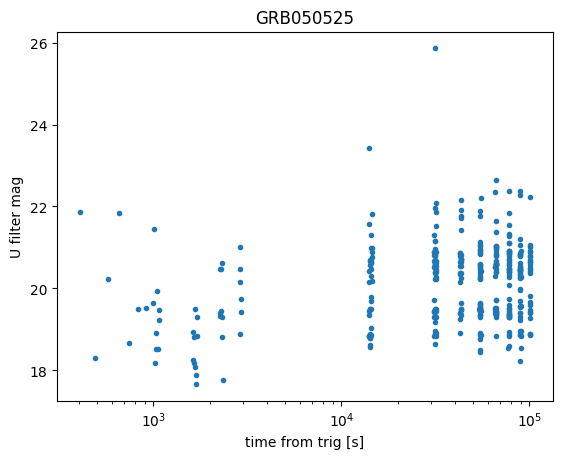

In [6]:
sel_plot(sel_obj[2])
ax=pl.gca()
pl.xscale("log")

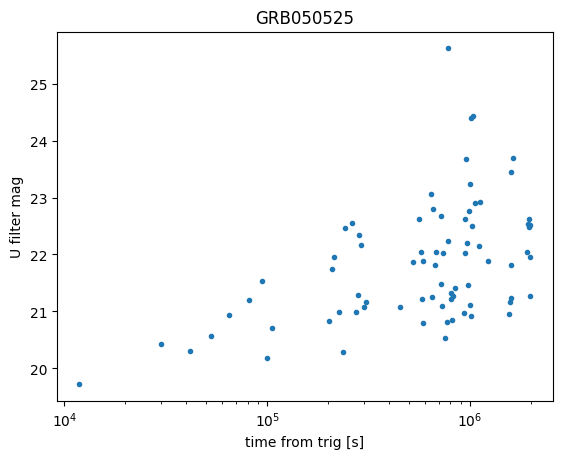

In [7]:
sel_plot(sel_obj[3])
pl.xscale("log")

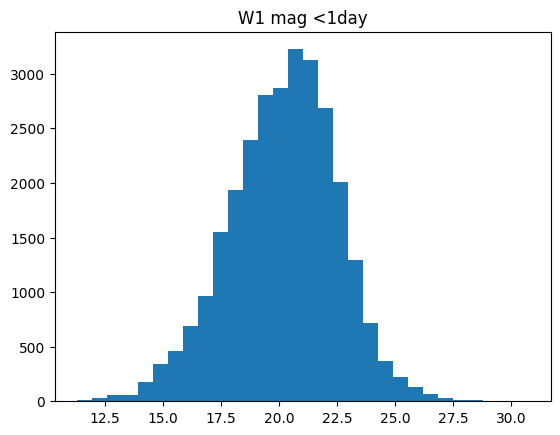

In [8]:
tsel=zimg.data['TSTART']-zimg.data['TRIGTIME']<8.5e4
allmag=zimg.data['MAG'][tsel]
pl.hist(allmag[allmag<99],30)
pl.title('W1 mag <1day');

In [9]:
ucts={}
for g in grbs:
    if grbs[g]<5: continue
    osel=zimg.data['OBJECT']==g
    t0=zimg.data['TRIGTIME'][osel*fsel][0]
    perr=zimg.data['POS_ERR'][osel*fsel][0]
    tobs=zimg.data['TSTART'][osel*fsel]-t0
    mag,emag=zimg.data['MAG'][osel*fsel],zimg.data['MAG_ERR'][osel*fsel]
    expo=zimg.data['TELAPSE'][osel*fsel][0]
    ucts[g]=[grbs[g],min(mag),sum(emag<2),tobs[np.argmin(mag)],perr,expo]

Text(0.5, 1.0, 'no of meas in W1 with mag_err<2')

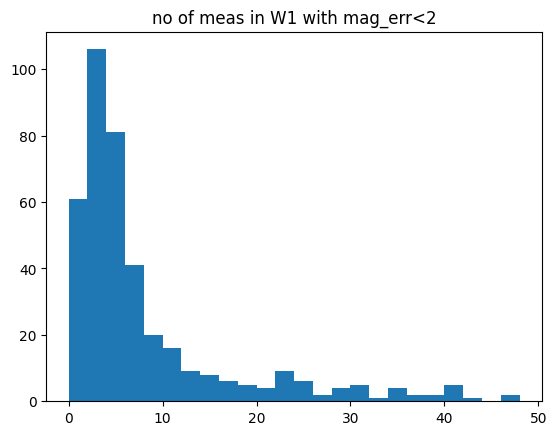

In [10]:
pl.hist([u[2] for u in ucts.values()],np.r_[:50:2])
pl.title("no of meas in W1 with mag_err<2")

In [11]:
sum(np.array([u[2] for u in ucts.values()])>40)/len(ucts.values())

0.06398104265402843

In [12]:
ersel=[k for k in ucts if ucts[k][2]>=10]
posel=[k for k in ucts if ucts[k][-1]<=1]
len(ersel),len(posel)

(113, 0)

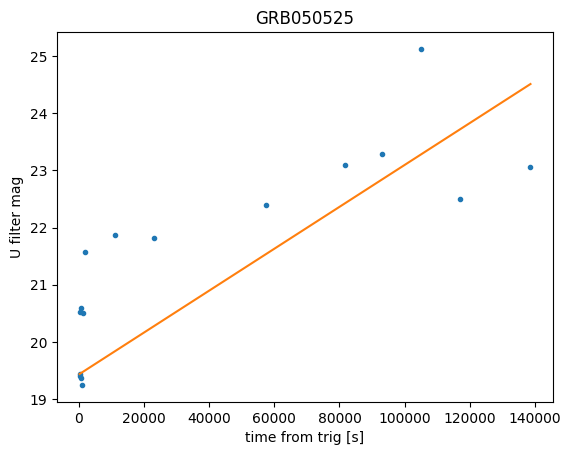

In [13]:
t,y,dy=sel_plot(ersel[0]);#pl.xscale("log");
idx=np.polyfit(t,y,1,w=1/dy)
pl.plot(t,np.polyval(idx,t))

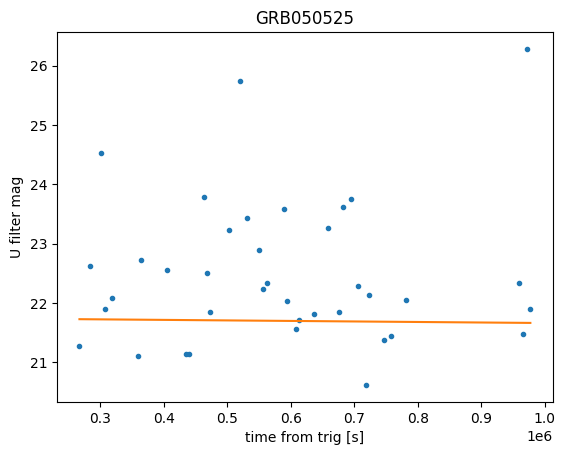

In [14]:
t,y,dy=sel_plot(ersel[12]);#pl.xscale("log");
idx=np.polyfit(t,y,1,w=1/dy)
pl.plot(t,np.polyval(idx,t))

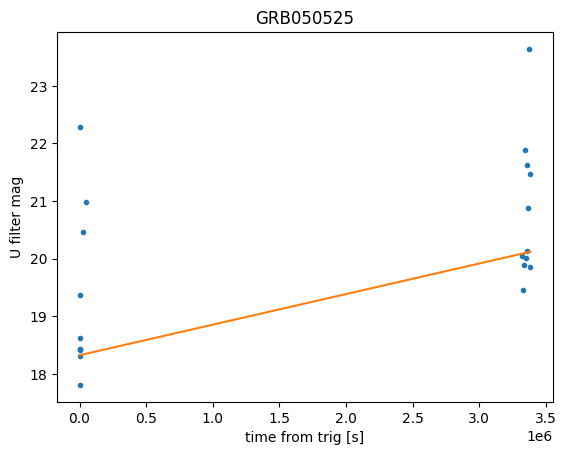

In [15]:
t,y,dy=sel_plot(ersel[4]);#pl.xscale("log");
idx=np.polyfit(t,y,1,w=1/dy)
pl.plot(t,np.polyval(idx,t))

24

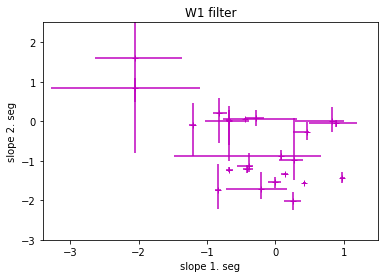

In [14]:
#pl.hist([u[1] for u in ucts.values()],np.r_[10:25:.5]);
sel=ww.data['ALP1_W1']>-10
sel*=ww.data['ALP2_W1']>-10
#pl.plot(ww.data['ALP1_W1'][sel],ww.data['ALP2_W1'][sel],'+')
er2=[-ww.data['ALP2N_W1'][sel],ww.data['ALP2P_W1'][sel]]
er1=[-ww.data['ALP1N_W1'][sel],ww.data['ALP1P_W1'][sel]]

pl.errorbar(ww.data['ALP1_W1'][sel],ww.data['ALP2_W1'][sel],er2,er1,'+',color='m')
pl.title('W1 filter')
pl.xlabel("slope 1. seg")
pl.ylabel("slope 2. seg")
pl.xlim(-3.4,1.5)
pl.ylim(-3,2.5)
sum(sel)

Text(0, 0.5, 'best mag W1')

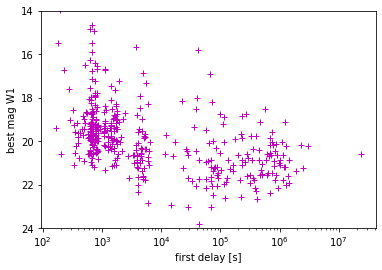

In [17]:
pl.semilogx([u[3] for u in ucts.values() if u[1]<99],[u[1] for u in ucts.values() if u[1]<99],'+',color='m')
pl.xlabel("first delay [s]")
pl.ylim(24,14)
pl.ylabel("best mag W1")

(array([ 5.,  8., 18., 97., 40., 51., 10., 13., 34.,  7.,  2.,  3.,  6.,
         8.,  7., 21., 11.,  5., 12., 12., 13., 18., 14.,  1.,  3.,  0.,
         0.,  0.,  0.,  1.]),
 array([2.22762965, 2.39891342, 2.5701972 , 2.74148097, 2.91276474,
        3.08404851, 3.25533229, 3.42661606, 3.59789983, 3.76918361,
        3.94046738, 4.11175115, 4.28303492, 4.4543187 , 4.62560247,
        4.79688624, 4.96817002, 5.13945379, 5.31073756, 5.48202134,
        5.65330511, 5.82458888, 5.99587265, 6.16715643, 6.3384402 ,
        6.50972397, 6.68100775, 6.85229152, 7.02357529, 7.19485906,
        7.36614284]),
 <BarContainer object of 30 artists>)

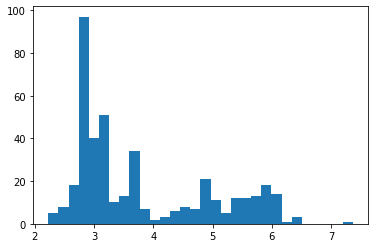

In [21]:
tfirst=[u[3] for u in ucts.values() if u[1]<99]
pl.hist(np.log10(tfirst),30)

In [28]:
sum(np.array(tfirst)<3600)/len(tfirst)

0.5571428571428572

In [16]:
ucts5={}
for g in grbs:
    if grbs[g]<5: continue
    osel=zimg.data['OBJECT']==g
    t0=zimg.data['TRIGTIME'][osel*fsel][0]
    tobs=zimg.data['TSTART'][osel*fsel]-t0
    mag,emag=zimg.data['MAG'][osel*fsel],zimg.data['MAG_ERR'][osel*fsel]
    aidx=np.argsort(mag)[:5]
    if mag[aidx[-1]]>90: continue
    ucts5[g]=[t0,mag[aidx].mean(),mag[aidx].std(),tobs[aidx].mean()]

Text(0, 0.5, 'best 5 mag W1')

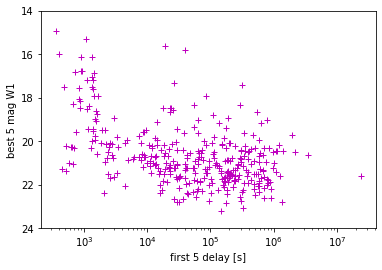

In [17]:
pl.semilogx([u[3] for u in ucts5.values() if u[1]<99],[u[1] for u in ucts5.values() if u[1]<99],'+',color='m')
pl.xlabel("first 5 delay [s]")
pl.ylim(24,14)
pl.ylabel("best 5 mag W1")

(281.0, 100.0)

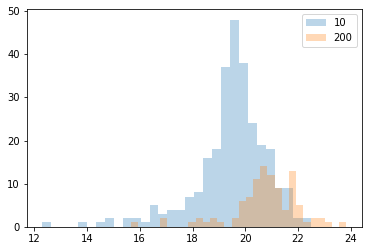

In [30]:
#pl.hist([u[-1] for u in ucts.values() if u[1]<99],np.r_[:210:30j])
expos=np.array([u[-1] for u in ucts.values() if u[1]<99])
mags=np.array([u[1] for u in ucts.values() if u[1]<99])
a1=pl.hist(mags[expos<20],30,alpha=0.3)
a2=pl.hist(mags[(expos>20)*(expos<250)],30,alpha=0.3)
pl.legend([10,200])
sum(a1[0]),sum(a2[0])

In [31]:
sum(mags[(expos>20)*(expos<250)]<=21)

59

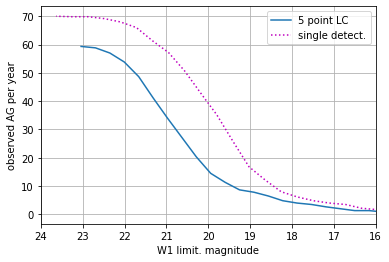

In [19]:
#at0
dy,dx=np.histogram([u[1] for u in ucts.values() if u[1]<99],30)
dy5,dx5=np.histogram([u[1] for u in ucts5.values()],30)
cdy=np.cumsum(dy)/6 #6 years of observations 
cdy5=np.cumsum(dy5)/6 #6 years of observations 
mdx=(dx[1:]+dx[:-1])/2
mdx5=(dx5[1:]+dx5[:-1])/2
pl.plot(mdx5,cdy5)
pl.plot(mdx,cdy,'m:')
pl.xlabel("W1 limit. magnitude")
pl.ylabel("observed AG per year")
pl.xlim(24,16)
pl.grid()
pl.legend(["5 point LC","single detect."])

Text(0, 0.5, 'spread best 5 mag U')

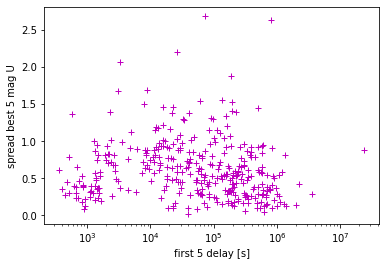

In [41]:
pl.semilogx([u[3] for u in ucts5.values() if u[1]<99],[u[2] for u in ucts5.values() if u[1]<99],'+',color='m')
pl.xlabel("first 5 delay [s]")
pl.ylabel("spread best 5 mag U")

(array([12., 28., 17., 29., 22., 23., 17., 20.,  6., 10., 22., 19., 26.,
        15., 21., 18., 11., 15., 16.,  9.]),
 array([1.32613182e+08, 1.41732277e+08, 1.50851371e+08, 1.59970465e+08,
        1.69089559e+08, 1.78208653e+08, 1.87327747e+08, 1.96446841e+08,
        2.05565936e+08, 2.14685030e+08, 2.23804124e+08, 2.32923218e+08,
        2.42042312e+08, 2.51161406e+08, 2.60280500e+08, 2.69399594e+08,
        2.78518688e+08, 2.87637783e+08, 2.96756877e+08, 3.05875971e+08,
        3.14995065e+08]),
 <BarContainer object of 20 artists>)

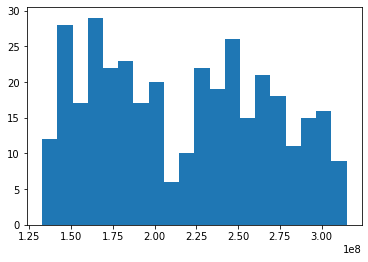

In [22]:
#at0
pl.hist([u[0] for u in ucts5.values()],20)

In [23]:
t0s=[u[0] for u in ucts5.values()]

In [24]:
from datetime import datetime
datetime.fromtimestamp(t0s[0])

datetime.datetime(1974, 3, 15, 21, 59, 42, 500000)

In [25]:
zimg.data['TRIG_UT'][0][:19]

'2005-01-17-12:52:36'

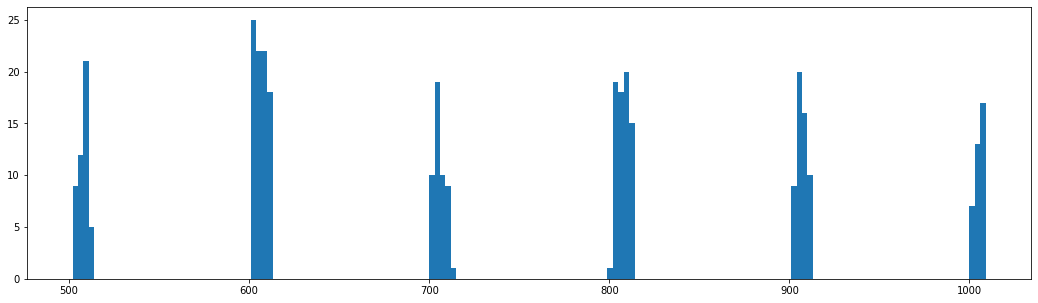

In [26]:
pl.figure(figsize=(18,5))
hoo=pl.hist([int(a[3:7]) for a in ucts5.keys()],np.r_[502:1012:3])[0];

24

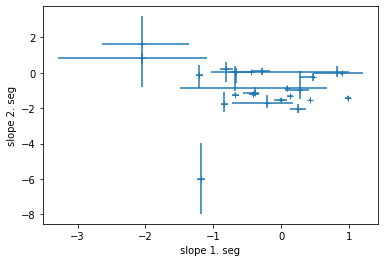

In [27]:
sel=ww.data['ALP1_W1']>-10
sel*=ww.data['ALP2_W1']>-10
#pl.plot(ww.data['ALP1_W1'][sel],ww.data['ALP2_W1'][sel],'+')
er2=[-ww.data['ALP2N_W1'][sel],ww.data['ALP2P_W1'][sel]]
er1=[-ww.data['ALP1N_W1'][sel],ww.data['ALP1P_W1'][sel]]

pl.errorbar(ww.data['ALP1_W1'][sel],ww.data['ALP2_W1'][sel],er2,er1,'+')
pl.xlabel("slope 1. seg")
pl.ylabel("slope 2. seg")
sum(sel)

In [28]:
er1

[array([0.5401, 0.0322, 0.5928, 0.1388, 0.0126, 0.1054, 0.0488, 0.069 ,
        0.046 , 0.3237, 0.2077, 1.5768, 0.4074, 0.064 , 0.5151, 0.3497,
        0.0872, 0.0486, 0.052 , 0.0503, 0.12  , 1.2308, 0.1722, 0.2189],
       dtype=float32),
 array([0.1784, 0.0436, 0.6871, 0.1178, 0.0217, 0.0954, 0.0433, 0.0828,
        0.0161, 0.7554, 0.0287, 0.5875, 0.3062, 0.0548, 0.3815, 0.2906,
        0.1098, 0.0542, 0.0469, 0.0533, 0.123 , 0.9597, 0.0679, 0.1364],
       dtype=float32)]

Text(0.5, 0, 'position err [arcsec]')

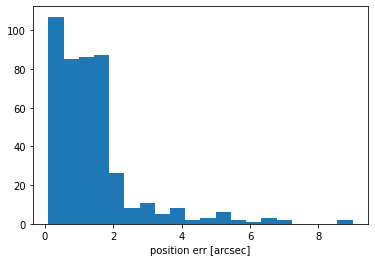

In [31]:
perr=zimg.data['POS_ERR'][fsel]
pd=perr[1:]-perr[:-1]
pid=np.where(pd!=0)[0]
pl.hist(perr[pid-1],20);
pl.xlabel("position err [arcsec]")

[[<matplotlib.lines.Line2D at 0x7f0e364d8670>],

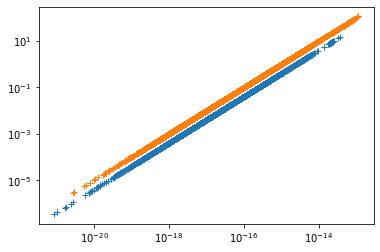

In [46]:
f1=zimg.data["FLUX_AA"]
f2=zimg.data["FLUX_HZ"]
f3=zimg.data["MAG"]
fl=zimg.data["FILTER"]
[pl.loglog(f1[fl==a],f2[fl==a],'+') for a in ['U','V','W1','M2']]

(6.9359996795654295, 36.0)

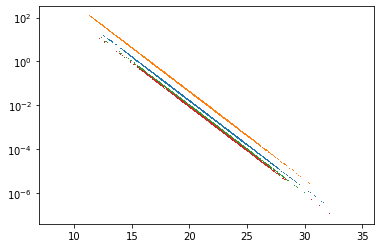

In [50]:
[pl.semilogy(f3[fl==a],f2[fl==a],',') for a in ['U','V','UVW1','UVM2']]
pl.xlim(None,36)